# HW4 : A visit to the movie zoo!

![](https://vignette.wikia.nocookie.net/bojackhorseman/images/f/f2/HSACWDTK%3FDTKT%3FLFO%21%21.png/revision/latest?cb=20150720050503)

## Task
In this homework, your task is to visualize THREE non-typical charts on anything related to your favorite **movie star!**
This means you CANNOT use the Big 4 chart types or their close variants (i.e. Pie, Bar, Line and Scatter, Area, etc.)

You are free to use any other chart type whether or not they were covered in class!
The lecture on Visit To The Zoo is a good place to start to get ideas on what kinds of charts exist.

For the data, you are free to use any data source you deem fit.
For charting, we will NOT be constraining the technology you use. 
You are free to produce the charts in any way you would like.

You will be judged on
* Creativity
* Presentation Quality
* Data Quality (Did your visualization reveal something interesting?)

For extra credit, you can make a fully interactive visualization.

## Ideas for Data Collection

Here, we show an example of how to collect data about Arnold Schwarzenegger!
Do note that this is just an example of the kind of data you can collect.
You are **NOT** constrained
* To the same movie star (you can pick your own!)
* To the same *kind* of data
* To the same data sources
* or to anything else!

This assignment gives you the power to do what you like!

In [3]:
from imdbpie import ImdbFacade
from IPython.core.display import display, HTML
from bs4 import BeautifulSoup
import urllib.request
import re

#### Get data for Arnold Schwarzenegger

In [12]:
# Get an instance of IMDb class
imdb = ImdbFacade()

# Search for Arnold Schwarzenegger
people = imdb.search_for_name('scarlett johansson')
print(people)

(NameSearchResult(imdb_id='nm0424060', name='Scarlett Johansson'), NameSearchResult(imdb_id='nm9564539', name='Scarlett Johanssim'), NameSearchResult(imdb_id='nm2526509', name='Scarlett Johanxon'))


In [31]:
# Fetch information about him
scarlett = imdb.get_name(people[0].imdb_id)

# What information do I have about her?
print('\n'.join([x for x in dir(scarlett) if not x.startswith('__')]))

bios
birth_place
date_of_birth
filmography
gender
image
imdb_id
name


In [14]:
# How many movies does she have?
print(len(scarlett.filmography))

302


In [42]:
# Let's fetch some more information about a movie
movie = imdb.get_title(scarlett.filmography[-1])

In [16]:
# What information can I get about this movie?
print('\n'.join([x for x in dir(movie) if not x.startswith('__')]))

certification
creators
credits
directors
episode
episodes
genres
image
imdb_id
plot_outline
rating
rating_count
release_date
releases
runtime
season
stars
title
type
writers
year


In [44]:
scarlett.filmography

('tt7587864',
 'tt6467266',
 'tt3480822',
 'tt2584384',
 'tt7653254',
 'tt4154796',
 'tt4154664',
 'tt0072562',
 'tt4154756',
 'tt8439068',
 'tt5104604',
 'tt4799050',
 'tt1219827',
 'tt3470600',
 'tt3498820',
 'tt3040964',
 'tt0475290',
 'tt2395427',
 'tt4334300',
 'tt2872732',
 'tt3757362',
 'tt1843866',
 'tt2883512',
 'tt3453566',
 'tt1798709',
 'tt1441395',
 'tt2229499',
 'tt0975645',
 'tt0848228',
 'tt1389137',
 'tt1228705',
 'tt1001508',
 'tt0831887',
 'tt0497465',
 'tt0437745',
 'tt0467200',
 'tt1198099',
 'tt0489237',
 'tt4397384',
 'tt7112342',
 'tt0482571',
 'tt0387877',
 'tt0457513',
 'tt0399201',
 'tt0416320',
 'tt8922990',
 'tt0385267',
 'tt0434356',
 'tt0345950',
 'tt0379306',
 'tt0369672',
 'tt0314498',
 'tt0335119',
 'tt0335266',
 'tt0271367',
 'tt0221799',
 'tt0162346',
 'tt0243133',
 'tt0165396',
 'tt0119314',
 'tt0119303',
 'tt0119098',
 'tt0116606',
 'tt0116985',
 'tt0111924',
 'tt0113501',
 'tt0110687',
 'tt3609102',
 'tt0072562',
 'tt0081857',
 'tt3444938',
 'tt03

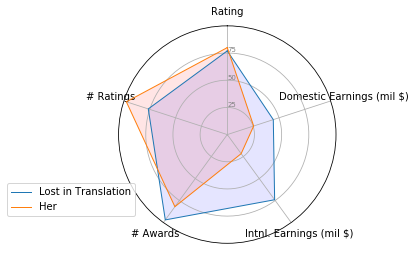

In [143]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'Rating': [77, 80, 30, 4],
'Domestic Earnings (mil $)': [44.5, 25.5, 9, 34],
'Intnl. Earnings (mil $)': [74.1, 21.7, 23, 24],
'# Awards': [97, 82, 33, 14],
"# Ratings": [38.2*2, 48.8*2, 32, 14]
})
 
 
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
plt.ylim(0,100)
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Lost in Translation")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Her")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.3))



In [17]:
print(movie.imdb_id)

tt8355462


In [18]:
html = """
    <div style="background-color:#FFDDDD">
    <h2> Warning! </h2>
    <p> This code below is meant to be an example of what you can do. <br>
        It is not guaranteed to work always, and will need to be tweaked!
    </p>
    </div>
"""
display(HTML(html))

#### Box office numbers

In [97]:
# Let's experiment with LiT
imdb_id = 'tt0335266'

# Fetch the box office numbers
base = 'https://www.boxofficemojo.com'
url = base + '/title/' + imdb_id
source = urllib.request.urlopen(url).read()
soup = BeautifulSoup(source,'lxml')

table = soup('th', text=re.compile(r'Release Group'))[0].parent.parent
group = table.findAll('tr', recursive=False)[1].find('a').get('href')
url = base + group

# Get total earnings domestic and international
source = urllib.request.urlopen(url).read()
soup = BeautifulSoup(source,'lxml')
earnings = soup('h2', text=re.compile(r'Rollout'))[0].parent.parent.findAll('div')
domestic = earnings[1].find('span', {'class': 'money'}).get_text()
domestic_url = earnings[1].find('a').get('href')
international = earnings[2].find('span', {'class': 'money'}).get_text()

# Get weekly domestic earnings
url = base + domestic_url
url = url[:url.rfind('/')] + '/weekly/'
source = urllib.request.urlopen(url).read()
soup = BeautifulSoup(source,'lxml')
table = soup.find('div', {'class':'a-section imdb-scroll-table-inner'}).findAll('tr')
weekly = []
for tr in table[1:]:
    date = tr.findAll('td')[0].get_text()
    earning = tr.findAll('td')[2].get_text()
    weekly.append((date, earning))

# Print the values we've just got!
print("Total Domestic Earnings: %s" % domestic)
print("Total International Earnings: %s" % international)
print("Weekly Domestic Earnings:")
for date, earning in weekly:
    print("\t%s \t: %s" % (date, earning))

Total Domestic Earnings: $44,585,453
Total International Earnings: $74,100,000
Weekly Domestic Earnings:
	Sep 12-18 	: $1,334,291
	Sep 19-25 	: $3,617,123
	Sep 26-Oct 2 	: $4,912,668
	Oct 3-9 	: $5,445,813
	Oct 10-16 	: $3,751,040
	Oct 17-23 	: $2,566,948
	Oct 24-30 	: $1,983,380
	Oct 31-Nov 6 	: $1,689,674
	Nov 7-13 	: $1,303,150
	Nov 14-20 	: $924,977
	Nov 21-27 	: $828,208
	Nov 28-Dec 4 	: $669,218
	Dec 5-11 	: $405,245
	Dec 12-18 	: $337,310
	Dec 19-25 	: $516,784
	Dec 26-Jan 1, 2004 	: $800,873
	Jan 2-8 	: $686,218
	Jan 9-15 	: $1,047,837
	Jan 16-22 	: $1,130,219
	Jan 23-29 	: $1,330,368
	Jan 30-Feb 5 	: $2,840,406
	Feb 6-12 	: $2,201,411
	Feb 13-19 	: $256,444
	Feb 20-26 	: $1,053,387
	Feb 27-Mar 4 	: $479,165
	Mar 5-11 	: $439,182
	Mar 12-18 	: $165,558
	Mar 19-25 	: $62,399


In [98]:
# Let's experiment with Her
imdb_id = 'tt1798709'

# Fetch the box office numbers
base = 'https://www.boxofficemojo.com'
url = base + '/title/' + imdb_id
source = urllib.request.urlopen(url).read()
soup = BeautifulSoup(source,'lxml')

table = soup('th', text=re.compile(r'Release Group'))[0].parent.parent
group = table.findAll('tr', recursive=False)[1].find('a').get('href')
url = base + group

# Get total earnings domestic and international
source = urllib.request.urlopen(url).read()
soup = BeautifulSoup(source,'lxml')
earnings = soup('h2', text=re.compile(r'Rollout'))[0].parent.parent.findAll('div')
domestic = earnings[1].find('span', {'class': 'money'}).get_text()
domestic_url = earnings[1].find('a').get('href')
international = earnings[2].find('span', {'class': 'money'}).get_text()

# Get weekly domestic earnings
url = base + domestic_url
url = url[:url.rfind('/')] + '/weekly/'
source = urllib.request.urlopen(url).read()
soup = BeautifulSoup(source,'lxml')
table = soup.find('div', {'class':'a-section imdb-scroll-table-inner'}).findAll('tr')
weekly = []
for tr in table[1:]:
    date = tr.findAll('td')[0].get_text()
    earning = tr.findAll('td')[2].get_text()
    weekly.append((date, earning))

# Print the values we've just got!
print("Total Domestic Earnings: %s" % domestic)
print("Total International Earnings: %s" % international)
print("Weekly Domestic Earnings:")
for date, earning in weekly:
    print("\t%s \t: %s" % (date, earning))

Total Domestic Earnings: $25,568,251
Total International Earnings: $21,783,000
Weekly Domestic Earnings:
	Dec 13-19 	: $104,258
	Dec 20-26 	: $788,063
	Dec 27-Jan 2, 2014 	: $1,322,655
	Jan 3-9 	: $1,184,324
	Jan 10-16 	: $7,600,127
	Jan 17-23 	: $5,890,981
	Jan 24-30 	: $3,157,108
	Jan 31-Feb 6 	: $1,685,371
	Feb 7-13 	: $976,103
	Feb 14-20 	: $861,620
	Feb 21-27 	: $602,685
	Feb 28-Mar 6 	: $562,883
	Mar 7-13 	: $353,289
	Mar 14-20 	: $217,903
	Mar 21-27 	: $103,373
	Mar 28-Apr 3 	: $80,681
	Apr 4-10 	: $48,118
	Apr 11-17 	: $28,709


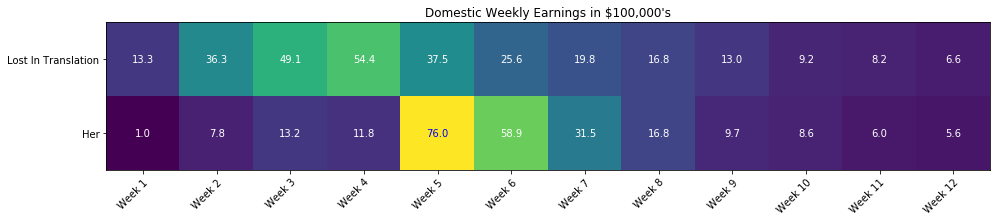

In [142]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import itertools
# sphinx_gallery_thumbnail_number = 2

vegetables = ["Lost In Translation", "Her"]
farmers = ["Week 1", "Week 2", "Week 3",
           "Week 4", "Week 5", "Week 6", "Week 7"
          , "Week 8", "Week 9", "Week 10", "Week 11"
          , "Week 12"]

harvest = np.array([[13.3, 36.3, 49.1, 54.4, 37.5, 25.6, 19.8, 16.8, 13.0, 9.2, 8.2, 6.6],
                    [1.0, 7.8, 13.2, 11.8, 76.0, 58.9, 31.5, 16.8, 9.7, 8.6, 6.0, 5.6]])


fig, ax = plt.subplots(figsize=(14, 7))
im = ax.imshow(harvest, cmap="viridis")

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        if (j == 4) & (i == 1):
            text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="b")
        else:
            text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Domestic Weekly Earnings in $100,000's")
fig.tight_layout()

plt.show()

## Other resources!

This assignment doesn't have a restriction on where you can look for data.
Further, we don't mind how you collect the data, or what data you collect.

Here are some additional resources for this example, and you can customize it for your own!
* Arnold Schwarzenegger Kill Count: https://www.youtube.com/watch?v=OE6jpTaOYMU
* Arnold Schwarzenegger Top Quotes: https://www.youtube.com/watch?v=pDxn0Xfqkgw

You could think about the IMDB network as a graph, with different actors connected through movies.

Some other useful libraries/ databases:
* IMDBPy
* http://www.omdbapi.com/

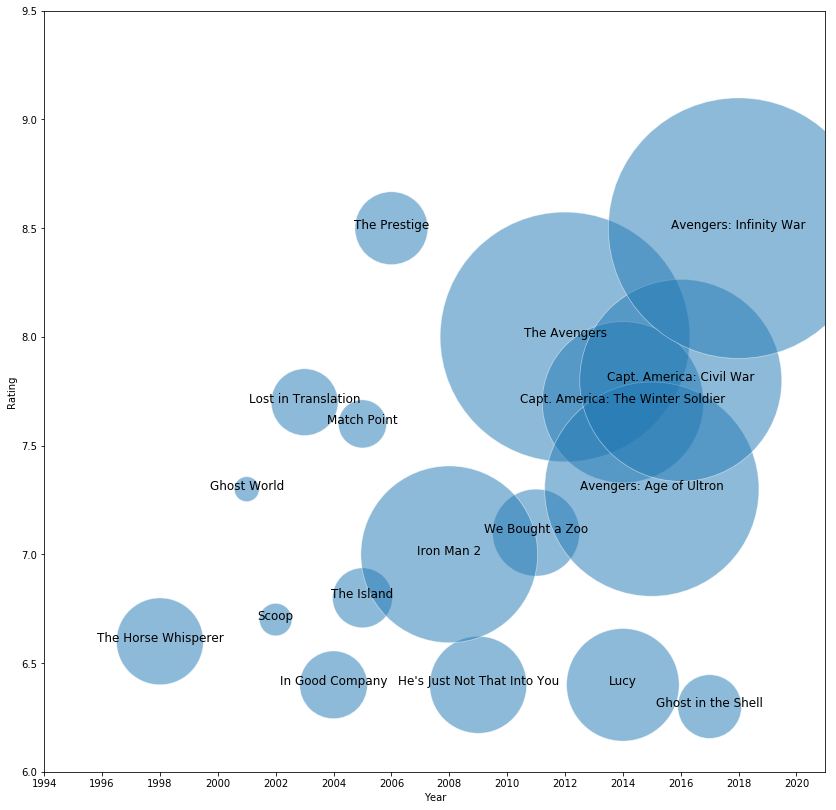

In [261]:
# Load libraries
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

# Create example dataframe
df = pd.DataFrame({
'x': [4, 9, 10, 11, 17, 15, 7, 11, 8, 12, 14, 18, 20, 23, 20, 21, 22, 24],
'y': [6.6, 7.7, 6.4, 7.6, 7.1, 6.4, 7.3, 6.8, 6.7, 8.5, 7, 8, 6.4, 6.3, 7.7, 7.3, 7.8, 8.5],
's': [7538.3, 4458.5 , 4580.6, 2315.1, 7562.4, 9395.3, 621.7, 3581.8, 1052.5, 5308.9, 31243.3, 62335.7, 12666.3,
     4056.3, 25976.6, 45900.5, 40808.4, 67881.5],
'group': ['The Horse Whisperer','Lost in Translation','In Good Company','Match Point', 'We Bought a Zoo',
         "He's Just Not That Into You", "Ghost World", "The Island", "Scoop", "The Prestige", "Iron Man 2",
         "The Avengers", "Lucy", "Ghost in the Shell", "Capt. America: The Winter Soldier", "Avengers: Age of Ultron",
         "Capt. America: Civil War", "Avengers: Infinity War"]
})

#Create figure
plt.figure(figsize = (14,14))

# Create scatterplot. alpha controls the opacity and s controls the size.
ax = sns.scatterplot(df.x, df.y, alpha = 0.5,s = df.s)

ax.set_xlim(0 ,27)
ax.set_ylim(6, 9.5)

plt.xticks(np.arange(0, 28, 2), np.arange(1994,2022,2).tolist())

#For each point, we add a text inside the bubble
plt.ylabel("Rating")
plt.xlabel("Year")
for line in range(0,df.shape[0]):
     ax.text(df.x[line], df.y[line], df.group[line], horizontalalignment='center', size='large', color='black')

In [181]:
np.arange(24)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [182]:
len(np.arange(1997,2020,1).tolist())

23